#### # 학습 시 참고한 URL : https://datascienceschool.net

#### 1. 퍼셉트론 개요

<img src="1.jpg" width="1000" />

- 1, x1, x2, ..., xm은 이것들은 예를 들어 한장의 이미지 벡터라고 할 수 있다. 여기서 1은 bias가 augmentation 된 것이다. 이 퍼셉트론이 구별할 수 있는 것은 기본적으로 이진분류밖에 안된다. 


- 일단 사진 한장 들어오면 이 사진이 벡터로 쪼개져서 각각 가중치와 곱해져서 더해지게된다. 이렇게 내적이 되서 어떤 값이 나오는데 이 값이 양수면 강아지, 음수면 고양이 이런식으로 구분을 하겠다는 것이다.


- 여기서 문제는 강아지와 고양이를 구분 잘하는 w값을 찾아야하는데 이 w를 어떻게 찾아야 하는가. 만약에 1000개의 사진을 사용했다고 하면 몇장을 맞추고 몇장을 틀리는지 이런게 나오는데 이 정보를 이용해서 loss함수(손실함수)를 정의한다. 그리고 정의된 손실함수를 이용해서 가중치를 갱신한다. 


- 퍼셉트론에서는 입력데이터의 벡터들이 가중치와 내적하여 더해진것을 활성화 값 또는 activations 이라고 한다. 1을 포함하는 입력 요소  xi 에 대해 가중치  wi 를 곱한 값

$$\ a = w^T x $$

을 activations이라고 하며 이 값이 판별함수의 역할을 한다.


- 그리고 이 활성화값이 그냥나기지 않고 항상 어떤 비선형함수를 거쳐서 나가게 다. 다시말해 판별함수 값이 활성화함수 또는 activation function h(a)를 지나면 분류 결과를 나타내는 출력 y헷이 나온다.

$$\ \hat{y} = h(w^Tx) $$


- 퍼셉트론의 활성화 함수는 부호함수 또는 sign function라고 부르거나 단위계단함수 Heaviside step function라고 부르는 함수이다.

$$\ h(a) = \begin{cases} -1, & a < 0, \\ 1, & a \ge 0 \end{cases} $$


#### 2. 퍼셉트론 손실함수

<img src="2.jpg" width="1000" />


- 퍼셉트론의 손실함수는 다음과 같이 구한다. N개의 학습용 데이터가 있고 손실함수 전체는 i번째 문제에 대해 y헷과 정답인 y를 비교해서 같은 값이면 손실이 없는 것이고 다르면 손실이 있는 것으로 계산한다. 그래서 N개의 데이터의 하나하나의 손실함수를 모두 더해서 전체 손실함수를 만드는 형태이다. 


- 가중치  w 에 따라 달라지는 전체 예측 오차  L는  i 번째 개별 데이터에 대한 손실함수 $$\ L_i(\hat{y}_i, y_i) $$의 합으로 측정된다.

$$\ L = \sum_{i=1}^N L_i(y_i, \hat{y}_i) $$

$$\ L_i(\hat{y}_i, y_i) $$ 는 실제값 y와 예측값 y헷의 차이를 나타내는 함수이다.


- 참고로 회귀분석에서는 y와 y헷값을 빼서 제곱한 값을 썼는데 분류문제에서는 이방삭을 쓸 수가 없다. 왜냐하면 y헷값이 엄청나게 큰값이 나오게 되면 이 엄청나게 큰 값을 하나 줄이기 위해 모든애너지를 다 쓰게 된다. 이 오차가 큰 값 하나를 줄이고자 다른 데이터들이 틀리는 것도 상관이 없어진다. 다른데이터 10개 더 틀려도 이 오차가 큰값하나 맞추는게 중요해진다는 말이다. 이렇게 되면 잔차제곱합이 확 줄어들게 되기 때문이다. 이러한 이유때문에 분류문제에서는 이방식을 쓸 수가 없다. 


- 분류문제에서는 비선형적인 방법을 써야한다. 판별함수 모형에서는 기본적으로 y나 y헷은 1하고 -1이다. 그래서 초기의 퍼셉트론은 y는 1하고 -1밖에 안된다. 왜냐하면 활성화함수값이 1아니면 -1이기 때문이다. 퍼셉트론의 손실함수는 정답이면 0 틀리면 1로 출력되는 함수이다. 이를 제로원 손실함수 또는 zero-one loss function이라고 한다.

$$\ L_i(y_i, \hat{y}_i) = \max(0, -y_i\hat{y}_i) $$


- 전체 손실함수는 다음과 같이 표현할 수 있다. 

$$\ L = \sum_{i=1}^N \max(0, -y_i\hat{y}_i) = - \sum_{i \in M}  y_i\hat{y}_i $$

식 마지막에 max가 없어진것을 볼 수 있는데 이는 M에 속하는 i에 대해서만 계산을 하겠다는 것이다. M은 missclassification된 데이터를 말한다. 다시말해 missclassification된 얘들만 서메이션을 하겠다는 것이다. 같은 얘들은 차피 0이고 1인 얘들만 더해주는 것이기 때문이다.


- 그런데 위와 같이 손실함수를 쓰면 함수의 최적화를 할때 $$\ \hat{y}(x) $$가 x에 대한 계단형 함수이므로 대부분의 영역에서 기울기가 0이 되어 미분값으로부터 최소점의 위치를 구할 수가 없다.(= 거의 모든위치에서 그레디언트가 0이 되는 현상이 발생한다.) 그래서 우리가 알고 있는 기울기를 이용한 최적화 방법은 이런형태일때는 적용할 수 없는 문제가 발생한다.


- 그래서 퍼셉트론에서는 엑티베이션을 없는걸로 치자. y헷 대신에 활성화값 wTx를 손실함수로 사용하자는 아이디어를 가져온다. 핵심은 엑티베이션을 없애는 대신에 missclassification된 데이터만 더하자는 것이다.

$$\ L_p(w) = - \sum_{i \in M} y_i \hat{y}_i  = - \sum_{i \in M} y_i \cdot w^Tx_i $$ 

이를 퍼셉트론 손실함수 또는 제로힌지 손실함수라고한다.

#### 3. 가중치 w 계산

<img src="3.jpg" width="1000" />

- 그래서 이렇게 퍼셉트론 손실함수를 구하게 되면 우리는 퍼셉트론 손실함수  LP(w)를 최소화하는  w를 찾기 위해  LP(w)를  w 로 미분하여 그레디언트를 구할 수 있다.

퍼셉트론 손실함수를 그레디언트 디센트를 적용하면 다시말해 w값으로 미분하게 되면 w가 없어지게 되기 때문에 아래와 같이 나오게 된다. 여기서 주의해야 할 점은 통상 그레디언트 디센트는 그레디언트를 구할때 전체데이터에 대해서 서메이션을 했는데 여기에서는 틀린데이터에서만 그레디언트를 뽑게된다.

$$\ \dfrac{dL_P}{dw} = - \sum_{i \in M} x_i y_i $$

그리고 gradient descent 방법을 사용해 다음과 같이  w 를 갱신할 수 있다.

$$\ \begin{eqnarray}
w_{k+1} 
&=& w_{k} + \eta_k \sum_{i \in M} x_i y_i \\
\end{eqnarray} $$

여기에서 에타는 step size 또는 학습속도(=learning rate)라고 한다.


- 초창기의 퍼셉트론에서는 컴퓨테이션 리소스가 부족해서 missclassification된 데이터중에 다쓰지도 않고 틀린 데이터중에 하나만 무작위로 골라서 했다. 왜냐하면 차피 우리가 구하는 그레디언트값과 현실적으로 적용하는 그레디언트 값이 다르기 때문이다. 다시말해 loss function이 우리가 쓰려고 했던게 미분이 안되어서 어쩔수 없이 그거와 비슷한 것으로 미분이 되는 것을 썼기 때문이다. 그래서 우리가 현실적으로 적용해서 뽑는 그레디언트가 감소한다고해서 원래 loss function도 감소한다는 보장이 없다. 차피 다른거 이래저래 틀린거 꼭 missclassification된 데이터를 다쓰지말고 그냥 데이터 하나만 쓰자는 취지였다.


- 위에 언급한 내용을 다시 말하면 실제로는 계산량을 줄이기 위해 전체 오분류 데이터 집합  M  중에서 하나만 골라서 사용한다. 다음 식에서  m 은 오분류된 데이터 중의 하나를 무작위로 고른 것이다. ($$\ m \in M $$)

$$\ w_{k+1} = w_{k} + \eta_k  x_m y_m $$

또한 y헷값이 1 또는 -1의 값만 가질 수 있으므로 실제로는 다음과 같은 수식이 도출된다. $$\ w_{k+1} =
\begin{cases} 
w_{k} + \eta_k x_m  & \text{ if } \hat{y}_m = 1 \neq y_m \\ 
w_{k} - \eta_k x_m, & \text{ if } \hat{y}_m = -1 \neq y_m \\ 
\end{cases} $$

그런데 퍼셉트론 손실함수는 원래의 손실함수와 정확하게 같지 않기 때문에 이러한 방식으로 학습을 했을 때 매 단계마다 반드시 원래의 손실함수가 감소한다는 보장은 없다. 

다만 퍼셉트론 수렴 정리라는 이론으로부터 위와 같이 수렴을시키면 원래 퍼셉트론이 최소화하고자 한 오분류된 데이터의 갯수가 최소화 된다는 것이 증명되어 있다. 단 데이터가 linearly separable가능한 경우여야 하고 이런 경우에는 완전분류모형으로 수렴한다는 것이 증명되어 있다.


- Scikit-Learn에서 Perceptron 클래스를 제공하는데 max_iter이라는 인수를 입력할 수 있다. 퍼셉트론에서 위와 같이 최적화하면 항상 oscillation 현상이 발생하기 때문에 조절할 수 있는 의미이다.


- 우리가 줄이는 것이 정확하게 loss 함수를 줄이는 것이 아니기 때문에 얘는 한스텝 갈때마다 반드시 로스함수가 감소한다는 보장이 없다. 대신에 loss 함수가 줄어드는 추세는 있다.


- 통상 최적화 문제에서 SGD 방식에서는 마지막으로 가면 그레디언트가 0이 되어 움직이지 않게 되는데 퍼셉트론에서 최적화는 loss function 자체를 다른것을 썼기 때문에 최적화에 도달했어도 그레디언트에 해당하는 값이 0이 아닌값이 나온다. 다시말해 최적화 부근에서도 계속 진동하게 된다.


- 단 퍼셉트론 수렴정리의 약점은 언제 그레디언트가 최적화에 수렴하는지 보장하지 않는다는 것이다. 현실적으로 사람이 느껴지지 않을 정도로 수렴할 수도 있다. 그렇게 되면 사용자가 loss값이 충분이 작다고 판단하면 임의로 스톱을 시킬 수 있다. 이런방식을 early stopping이라고 한다. 다시말해 사용자가 원하는 loss값이 나오면 그냥 중간에 최적화 수렴을 중지시키는 것이다. 현실적으로 사용자가 원하는 수준까지 loss level이 내려가면 특정 스텝이상 내가 원하는 로스 레벨이상 유지가 되면 그때 중지시킨다.

#### 4.Stochastic Gradient Descent(SGD)

<img src="4.jpg" width="1000" />

- 딥러닝에서도 최적화를 퍼셉트론에서 하는 방식과 거의 비슷하게 한다. 그것을 Stochastic Gradient Descent(SGD)라고 한다. 우리가 최적화를 할때는 loss function 자체의 값을 아예줄였다. 그러나 SGD는 loss function을 정확하게 추정하는것이 힘들다고 판단하고 loss function의 기댓값을 줄이겠다. 정확하게는 loss function의 추정치를 줄여보겠다는 것이다. loss function의 추정치는 어떻게 줄이냐. 그레디언트의 추정치를 구해야 한다. loss function 자체가 이미 추정치이기 때문에 그레디언트도 추정치를 구하면 된다. 


- 추정치를 구하면 우리가 어떤데이터가 있을때 거기에 있는 샘플 평균을 내면된다. 이말은 로스함수의 평균을 낸다는 말과 같은데 평균을 낼때 반드시 모든데이터를 다 안써도 된다. 예를들어 중국인들의 키를 나타내는 확률분포의 중강값을 구하기 위해서 반드시 13억개의 키를 다 더해서 중앙값을 구하지 않아도 된다는 말이다. 중국인 데이터의 샘플 하나를 뽑아서 하던 두개를 뽑아서 하던 그것의 기댓값은 원래 중국인 데이터 전체의 기댓값과 같다. 다만 오차범위가 많이 뽑으면 많이 뽑을 수록 작아지는 것이고 내가 원하는 오차범위 내에만 있으면 13억개를 다 안써도 된다. 100개만 써도 된다는 말이다. 


- SGD에서는 모든데이터를 다 안쓰고 그중에 일부데이터만 랜덤하게 뽑아서 걔로만 그레디언트를 구한다. 그것을 미니배치라고 한다. 미니배치로만 수렴을 시키는게 SGD이다. 이 방법이 딥러닝에서 많이 쓰이는데 딥러닝에서는 로스함수 한번 구하는게 너무 어렵기 때문이다. 왜냐하면 데이터 자체가 엄청하게 크기 때문이다. 피처디멘전 자체도 엄청 크다. 예를들어 10만화소 이미지면 10만 X 10만 이기때문에 데이터 하나가 10만 차원이 되는것이다. 이런 데이터도 10만개 100만개 막 이런수준으로 있다.


- SGD는 수학적으로 기댓값 자체는 특정한 손실범위 안으로 들어 온다는 것을 증명했다. 그러나 이 손실범위가 여러가지 하이퍼파라미터에 의해 결정되기 때문에 그게 반드시 우리가 원하는 굉장히 작은 영역이라는 것은 보장하지 않는다.

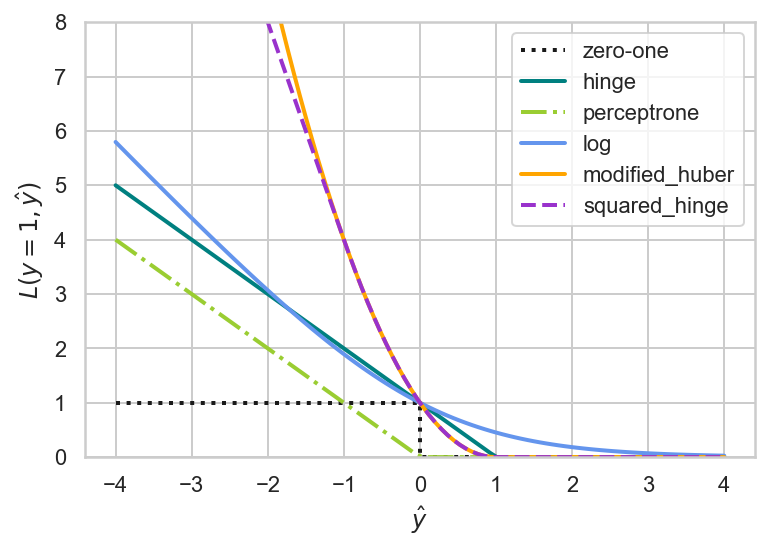

In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import matplotlib as mpl
import matplotlib.pyplot as plt

def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.] = 0
    return loss

xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='k', lw=2, ls=":", label="zero-one")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color='teal', lw=2, ls="-", label="hinge")
plt.plot(xx, -np.minimum(xx, 0), color='yellowgreen', lw=2, ls="-.", label="perceptrone")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color='cornflowerblue', lw=2, label="log")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, color='orange', lw=2, label="modified_huber")
plt.plot(xx, modified_huber_loss(xx, 1), color='darkorchid', lw=2, ls='--', label="squared_hinge")
plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"$\hat{y}$")
plt.ylabel(r"$L(y=1, \hat{y})$")
plt.show()

- 위의 그림은 y가 1이 정답인 것이고 y헷도 1이 되야 하는 것을 가정한 것이다. y헷이 1일 경우에는 손실이 없기 때문에 loss가 0이 된다. 그런데 1보다 크게되면 판별함수 모형이기 때문에 그것들도 loss function이 0인 것이다. 그런데 문제가 -1이라고 하게되면 완전 오분류가 되기 때문에 여기에는 loss function이 들어가게 된다.


- 처음에 썼던 loss function(zero-one)은 0,1로 구분을 하는 것으로 모델링을 하였고 이것의 문제는 미분이 안되기 때문에 perceptrone 함수를 썼다. 조금씩 에러를 주겠다 이거다. 이것도 사람들이 마음에 안드는 부분을 캐치했다. loss function을 굳이 왜 0부터 주게되냐 이게 불만이었다. 답이 1이 나와야하는게 정상이기 때문에 y헷이 1보다 작아지면 에러가 있다고 보는게 맞지 않느냐는 것이다.


- 그래서 1보다 작아지면 에러값을 주자는 것이 힌지 function이다. 힌지 손실함수는 퍼셉트론 손실함수를 앞으로 한칸 땡긴것이다.


- 이거를 힌지 손실함수와는 비슷하지만 좀더 좋은 특성을 갖게 해주자. 다시말해 멀리 떨어지면 에러값을 더 주고 이런식으로 부드럽게해주자 해서 나온것이 제곱 힌지 손실함수이다. 단 이게 안좋은점은 조금만 더커지면 차이가 엄청나게 벌어지게 된다. 그걸 막기위해 나온 것이 수정휴버 손실함수이다. 특정 수준까지는 제곱해주고 다시 어느 수준부터는 직선으로 기울기가 나가게 된다.


- 이렇게 다양한 loss function을 써도 퍼셉트론 수렴정리는 성립한다는 것이 수학적으로 증명이 되어있다. 단 저기에서 쓰는 조건은 1보다 크면 0이고 1보다 작으면 올라가면 올라가는 캐이스다(올라갔다 내려오고 이러면 안된다).


- SGD에서는 위에서 언급했던 로스함수들을 쓸 수 있는것처럼 여러가지 하이퍼파라미터들이 늘어나기 때문에 이것들을 잘 찾다보면 조금 더 좋은 수렴성능을 가질 수 있는 모델을 선택할 수 있는 폭을 늘려줬다.


- SGD방법은 딥러닝에서 가중치를 찾는데 쓰는 방법이 된다. loss function이 계속 감소한다는 보장이 없고, 마지막에 도달해서도 오실레이션이 있을 수 있고, 모든데이터를 전부 다쓰지 않고 미니배치라는 일부데이터만 뽑아서 그레디언트를 구한다는 특성이 그대로 딥러닝에 쓰인다는 말이다.


- 판별함수의 단점은 선형분리 되는 문제에 있어서 퍼포먼스 100퍼센트의 성능의 함수가 하나가 아니라는 것이다. 무수히 많을 수 있다. 